In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import mean
from scipy import stats
import seaborn as sns
from IPython.display import display, Math, Latex
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.decomposition import PCA
import altair as alt
from matplotlib.cbook import boxplot_stats

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import OneHotEncoder



import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt
import matplotlib.image as img

import tensorflow as tf

from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.python.keras.utils.vis_utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from tensorflow.keras.models import load_model


from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from tensorflow.python.keras.activations import relu, sigmoid

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
def PlotGraphsConfirmed(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy (Confirmed)')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss (Confirmed)')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [3]:
def PlotGraphsDeaths(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy (Deaths)')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss Deaths')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [4]:
def PlotGraphsRecovered(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy (Recovered)')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss (Recovered)')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [5]:
display(Latex(r"\newpage"));

<IPython.core.display.Latex object>

# CM1

<b>Pre-processing steps</b>

The preprocessing steps that we have used are :-
<ol>
     <li> Checking & Removing for NA values
     <li> Checking & Removing for Duplicate rows
     <li> Checking dtypes of dataframe & coverting them to appropriate types
     <li> Outlier Detection
     <li> Feature Selection
     <li> Dropping columns- Dropping columns like State and State_Id
     <li> Dealing with imbalanced Dataset- using Random Over and Underfitting
     <li> Normalization using z-score(standardization)
 </ol>           
<p> 
Most of the pre-processing steps were the same, however this time feature selection was paid more attention. In Assignment 2 Kaggle Competition, we found that dropping certain features improved our scores significantly, hence using the 'chi2' method, for feature selection, we found the most significant features (see 'Feature Selection' selection). We dropped all insignificant features and were left with 7 features.  We saw great increase in our Kaggle scores for Assignment 3 as well.
</p>

In [6]:
df = pd.read_csv('dkmacovid_train.csv')
df.shape

(1380, 17)

In [7]:
df.head(10)

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,"5,024,279",99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,"733,391",1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,"7,151,502",62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,"3,011,524",57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,"39,538,223",253.7,13,99,True,True,False
5,2,6,Colorado,39.0598,-105.3111,316043,5889.695239,4474747,1.448233,77703.63149,"5,773,714",55.7,39,101,True,True,True
6,2,7,Connecticut,41.5978,-72.7554,174221,5332.530032,4383361,3.207974,122945.53010,"3,605,944",744.7,6,95,True,True,False
7,2,8,Delaware,39.3185,-75.5071,39092,6045.920778,991318,1.579671,101802.69550,"989,948",508,8,94,True,True,False
8,2,9,District of Columbia,38.8974,-77.0268,7715,4181.231571,911378,2.683927,129136.27930,"689,545","11,280.00",1,96,True,True,True
9,2,10,Florida,27.7663,-81.6868,1332943,6308.080782,15950750,1.615697,74266.43692,"21,538,187",401.4,10,96,True,True,False


### Checking for NA values

In [8]:
df.dropna()
df.head()

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,"5,024,279",99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,"733,391",1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,"7,151,502",62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,"3,011,524",57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,"39,538,223",253.7,13,99,True,True,False


In [9]:
df.shape

(1380, 17)

### Checking for Duplicate rows

In [10]:
duplicate_rows=df.duplicated().sum()
print(duplicate_rows)

0


In [11]:
df.dtypes

Day                                  int64
State ID                             int64
State                               object
Lat                                float64
Long_                              float64
Active                               int64
Incident_Rate                      float64
Total_Test_Results                   int64
Case_Fatality_Ratio                float64
Testing_Rate                       float64
Resident Population 2020 Census     object
Population Density 2020 Census      object
Density Rank 2020 Census             int64
SexRatio                             int64
Confirmed                             bool
Deaths                                bool
Recovered                             bool
dtype: object

### Converting Object to float and removing ','

In [12]:
df["Resident Population 2020 Census"] = df["Resident Population 2020 Census"].str.replace(",","").astype(float)
df["Population Density 2020 Census"] = df["Population Density 2020 Census"].str.replace(",","").astype(float)
df.head()

,Day,State ID,State,Lat,Long_,Active,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,Testing_Rate,Resident Population 2020 Census,Population Density 2020 Census,Density Rank 2020 Census,SexRatio,Confirmed,Deaths,Recovered
0,2,1,Alabama,32.3182,-86.9023,162449,7535.061394,1891468,1.318688,38576.31315,5024279.0,99.2,29,94,True,False,False
1,2,2,Alaska,61.3707,-152.4044,40421,6534.252848,1290349,0.449781,176386.82510,733391.0,1.3,52,109,True,True,False
2,2,3,Arizona,33.7298,-111.4312,452222,7407.212013,5218721,1.680608,39916.14181,7151502.0,62.9,35,99,True,True,True
3,2,4,Arkansas,34.9697,-92.3731,24012,7669.219075,2079788,1.611203,68917.26567,3011524.0,57.9,36,96,True,True,True
4,2,5,California,36.1162,-119.6816,2362015,6045.109130,33391442,1.111215,84509.14544,39538223.0,253.7,13,99,True,True,False


In [13]:
df.dtypes

Day                                  int64
State ID                             int64
State                               object
Lat                                float64
Long_                              float64
Active                               int64
Incident_Rate                      float64
Total_Test_Results                   int64
Case_Fatality_Ratio                float64
Testing_Rate                       float64
Resident Population 2020 Census    float64
Population Density 2020 Census     float64
Density Rank 2020 Census             int64
SexRatio                             int64
Confirmed                             bool
Deaths                                bool
Recovered                             bool
dtype: object

In [14]:
from sklearn.preprocessing import LabelBinarizer
le = LabelBinarizer()
df['Confirmed'] = le.fit_transform(df['Confirmed'])
df['Deaths'] = le.fit_transform(df['Deaths'])
df['Recovered'] = le.fit_transform(df['Recovered'])

In [15]:
allFeatures = ['Day','State ID', 'Active', 'Lat', 'Long_', 'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census', 'Density Rank 2020 Census', 'SexRatio']
features = ['Day','State ID', 'Active', 'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census', 'Density Rank 2020 Census', 'SexRatio']
x = df.loc[:, features]
y = df.loc[:,['Confirmed','Deaths','Recovered']]

### Feature Selection
<p> Dropping features with lowest scores

In [16]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

                              Specs         Score
7   Resident Population 2020 Census  2.287888e+08
4                Total_Test_Results  1.727194e+08
2                            Active  3.406268e+07
6                      Testing_Rate  2.998740e+04
8    Population Density 2020 Census  1.794779e+04
3                     Incident_Rate  7.200984e+03
1                          State ID  7.249385e+02
9          Density Rank 2020 Census  1.778888e+02
10                         SexRatio  2.053331e+00
0                               Day  9.478541e-01
5               Case_Fatality_Ratio  7.579825e-01


### Dropping Columns

In [17]:
df_confirmed = df.drop(['State', 'State ID','Lat','Long_','Deaths', 'Recovered', 'SexRatio', 'Case_Fatality_Ratio', 'Day' ], axis = 1)
df_deaths = df.drop(['State', 'State ID','Lat','Long_','Confirmed', 'Recovered', 'SexRatio', 'Case_Fatality_Ratio', 'Day' ], axis = 1)
df_recovered = df.drop(['State', 'State ID','Lat','Long_','Deaths', 'Confirmed', 'SexRatio', 'Case_Fatality_Ratio', 'Day' ], axis = 1)

df_onlyFeatures = df.drop(['State', 'State ID','Lat','Long_','Deaths', 'Confirmed', 'Recovered', 'SexRatio', 'Case_Fatality_Ratio', 'Day' ], axis = 1)

## Dealing with the Imbalance of the Dataset

<p>The 'Confirmed' label is <b>very</b> imabalanced with the dataset having 1329 'True' labels and 51 'False' Labels. The 'Deaths' Label is also imbalanced but however not as much as 'Confirmed', 'Deaths' have 1244 'True' Labels and 136 'False' Labels. Lastly the Recovered 'label' is the most balanced.<p>
    
<p>To cater to this imbalance problem in 'Confirmed' and 'Deaths', we will perform both Random Oversampling and Random Undersampling (performed below). <p>    

In [18]:
y_confirmed=df_confirmed['Confirmed'].values
y_deaths=df_deaths['Deaths'].values

y_recovered=df_recovered['Recovered'].values

x=df_onlyFeatures.values

ros = RandomOverSampler()
rus = RandomUnderSampler()

# over and under sampling
x_ros_confirmed, y_ros_confirmed = ros.fit_resample(x, y_confirmed)
print(Counter(y_ros_confirmed))
x_ros_rus_confirmed, y_ros_rus_confirmed=rus.fit_resample(x_ros_confirmed, y_ros_confirmed)
print('Confirmed')
print(Counter(y_ros_rus_confirmed))

# over and under sampling
x_ros_deaths, y_ros_deaths = ros.fit_resample(x, y_deaths)
x_ros_rus_deaths, y_ros_rus_deaths=rus.fit_resample(x_ros_deaths, y_ros_deaths)
print('Deaths')
print(Counter(y_ros_rus_deaths))

Counter({1: 1329, 0: 1329})
Confirmed
Counter({0: 1329, 1: 1329})
Deaths
Counter({0: 1244, 1: 1244})


In [19]:
x_ros_rus_confirmed.shape

(2658, 7)

In [20]:
# allFeatures = ['Day','Lat','Long_','Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census','Density Rank 2020 Census','SexRatio']
allFeatures = ['Active','Incident_Rate','Total_Test_Results','Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census','Density Rank 2020 Census']

df_confirmed = pd.DataFrame(data = x_ros_rus_confirmed, columns = allFeatures )
df_confirmed['Confirmed'] = y_ros_rus_confirmed

In [21]:
# allFeatures = ['Day','Lat','Long_','Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census','Density Rank 2020 Census','SexRatio']
allFeatures = ['Active','Incident_Rate','Total_Test_Results','Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census','Density Rank 2020 Census']

df_deaths = pd.DataFrame(data = x_ros_rus_deaths, columns = allFeatures )
df_deaths['Deaths'] = y_ros_rus_deaths

### Z-Score Normalization

In [22]:
# columns_to_scale = ['Active','Lat','Long_','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census','Density Rank 2020 Census','SexRatio'] 
# columns_to_scale = ['Active','Incident_Rate','Total_Test_Results','Case_Fatality_Ratio','Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census','Density Rank 2020 Census','SexRatio'] 
columns_to_scale = ['Active','Incident_Rate','Total_Test_Results','Testing_Rate','Resident Population 2020 Census','Population Density 2020 Census','Density Rank 2020 Census'] 

scaler = StandardScaler()
df_confirmed[columns_to_scale] = scaler.fit_transform(df_confirmed[columns_to_scale])

df_deaths[columns_to_scale] = scaler.fit_transform(df_deaths[columns_to_scale])

df_recovered[columns_to_scale] = scaler.fit_transform(df_recovered[columns_to_scale])

In [23]:
# features = ['Day','Lat','Long_', 'Active', 'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census', 'Density Rank 2020 Census', 'SexRatio']
# features = ['Day', 'Active', 'Incident_Rate', 'Total_Test_Results', 'Case_Fatality_Ratio', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census', 'Density Rank 2020 Census', 'SexRatio']
features = ['Active', 'Incident_Rate', 'Total_Test_Results', 'Testing_Rate', 'Resident Population 2020 Census', 'Population Density 2020 Census', 'Density Rank 2020 Census']
x_confirmed = df_confirmed.loc[:, features].values
y_confirmed = df_confirmed.loc[:,['Confirmed']].values

x_deaths = df_deaths.loc[:, features].values
y_deaths = df_deaths.loc[:,['Deaths']].values

x_recovered = df_recovered.loc[:, features].values
y_recovered = df_recovered.loc[:,['Recovered']].values

In [24]:
arr = np.array(y_confirmed)
y_confirmed_newarr = arr.reshape(y_confirmed.shape[0],)

In [25]:
y_deaths.shape
arr = np.array(y_deaths)
y_deaths_newarr = arr.reshape(y_deaths.shape[0],)

In [26]:
y_recovered.shape
arr = np.array(y_recovered)
y_recovered_newarr = arr.reshape(y_recovered.shape[0],)

In [27]:
df_confirmed_targetOnly = df_confirmed['Confirmed']
df_confirmed_features = df_confirmed.drop(['Confirmed'], axis=1)

In [28]:
df_deaths_targetOnly = df_deaths['Deaths']
df_deaths_features = df_deaths.drop(['Deaths'], axis=1)

In [29]:
display(Latex(r"\newpage"));

<IPython.core.display.Latex object>

# CM2

### Model
<p> Two Hidden Layers with 20 nodes each and output layer activation function is softmax.
</p>

## Confirmed

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_confirmed, y_confirmed_newarr, test_size=0.2, random_state=98)

In [31]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(20, activation='relu', input_dim=7),
        tf.keras.layers.Dense(20, activation='relu',),
        tf.keras.layers.Dense(2, activation='softmax')
        ])

In [32]:
model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

In [33]:
history_default_confirmed = model.fit(x_train, y_train, validation_split=0.20, epochs=80, batch_size=20,verbose=0);

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


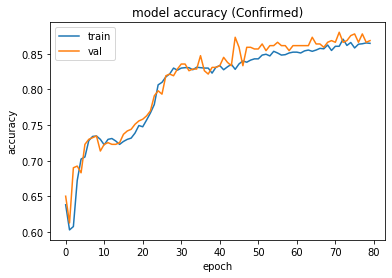

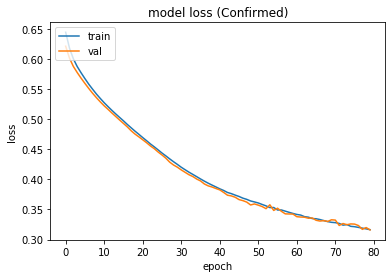

In [34]:
PlotGraphsConfirmed(history_default_confirmed) 

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy (Confirmed): ", test_acc)

17/17 - 0s - loss: 0.3393 - accuracy: 0.8440
Test accuracy (Confirmed):  0.8439849615097046


In [36]:
display(Latex(r"\newpage"));

<IPython.core.display.Latex object>

## Deaths

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_deaths, y_deaths_newarr, test_size=0.2, random_state=98)

In [38]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(20, activation='relu', input_dim=7),
        tf.keras.layers.Dense(20, activation='relu',),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

In [39]:
history_default_deaths  = model.fit(x_train, y_train, validation_split=0.20, epochs=80, batch_size=20,verbose=0);

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy (Confirmed): ", test_acc)

16/16 - 0s - loss: 0.4529 - accuracy: 0.7952
Test accuracy (Confirmed):  0.7951807379722595


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


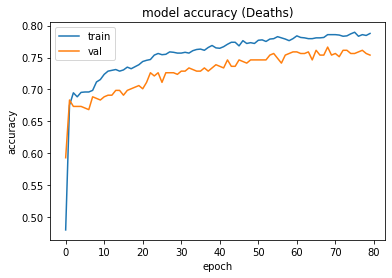

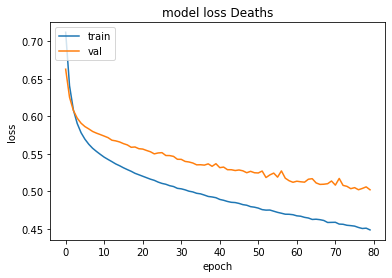

In [41]:
PlotGraphsDeaths(history_default_deaths) 

In [42]:
display(Latex(r"\newpage"));

<IPython.core.display.Latex object>

## Recovered

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_recovered, y_recovered_newarr, test_size=0.2, random_state=98)

In [44]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(20, activation='relu', input_dim=7),
        tf.keras.layers.Dense(20, activation='relu',),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

In [45]:
history_default_recovered = model.fit(x_train, y_train, validation_split=0.20, epochs=80, batch_size=20,verbose=0);

In [46]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy (Confirmed): ", test_acc)

9/9 - 0s - loss: 0.3789 - accuracy: 0.8261
Test accuracy (Confirmed):  0.8260869383811951


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


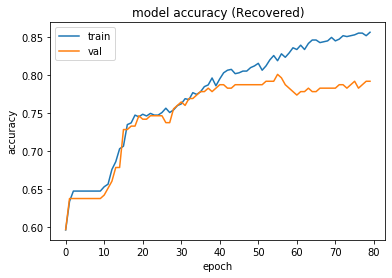

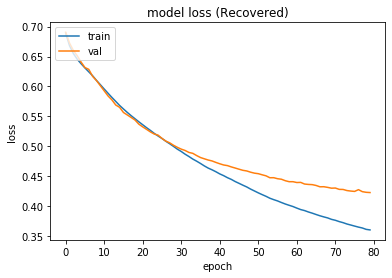

In [47]:
PlotGraphsRecovered(history_default_recovered) 

In [48]:
display(Latex(r"\newpage"));

<IPython.core.display.Latex object>

# CM3
<p> We chose three NN models with varying depths to test our model. See Conclusion section of CM3 for more details.</p>

## Confirmed

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_confirmed, y_confirmed_newarr, test_size=0.2, random_state=98)

## Different Models 
<p> We will try different NN model architectures. Shallow Depth, Normal and Deep Neural Network. <p>

### Shallow
<p> Only one hidden layers.

In [50]:
model = tf.keras.models.Sequential([    
    
        tf.keras.layers.Dense(64, activation='relu', input_dim=7),
        tf.keras.layers.Dropout(0.20),
    
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model_shallow_confirmed = model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [51]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=130, batch_size=30,verbose=0);
history_shallow_confirmed = history

In [52]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

test_acc_shallow_confirmed = test_acc
test_loss_shallow_confirmed = test_loss

17/17 - 0s - loss: 0.2910 - accuracy: 0.8947
Test accuracy:  0.8947368264198303


### Normal Depth
<p> Four hidden layers

In [53]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(256, activation='relu', input_dim=7),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Dense(128, activation='relu',),
        tf.keras.layers.Dropout(0.32),
    
        tf.keras.layers.Dense(64, activation='relu',),
        tf.keras.layers.Dropout(0.32),
    
        tf.keras.layers.Dense(32, activation='relu',),
        tf.keras.layers.Dropout(0.32),
    
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model_normal_confirmed = model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [54]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=250, batch_size=40,verbose=0);
history_normal_confirmed = history

In [55]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)
test_acc_normal_confirmed = test_acc
test_loss_normal_confirmed = test_loss

17/17 - 0s - loss: 0.2042 - accuracy: 0.9229
Test accuracy:  0.9229323267936707


In [56]:
# import os.path
# if os.path.isfile('models/confirmed_model.h5') is False:
#     model.save('models/confirmed_model.h5')
model.save('models/confirmed_model.h5')

In [57]:
new_model = load_model('models/confirmed_model.h5')

### Deep NN
<p> Eight hidden layers

In [58]:
model = tf.keras.models.Sequential([  
        tf.keras.layers.Dense(512, activation='relu', input_dim=7),
        tf.keras.layers.Dropout(0.35),
    
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.35),
    
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.35),
    
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.35),
    
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.35),
    
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.35),
    
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.35),
    
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dropout(0.35),
    
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model_deep_confirmed = model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [59]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=250, batch_size=60,verbose=0);
history_deep_confirmed = history

In [60]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

test_acc_deep_confirmed = test_acc
test_loss_deep_confirmed = test_loss

17/17 - 0s - loss: 0.2135 - accuracy: 0.9211
Test accuracy:  0.9210526347160339


In [61]:
display(Latex(r"\newpage"));

<IPython.core.display.Latex object>

## Deaths

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x_deaths, y_deaths_newarr, test_size=0.2, random_state=98)

### Shallow
<p> Only one hidden layers

In [63]:
model = tf.keras.models.Sequential([    
    
        tf.keras.layers.Dense(64, activation='relu', input_dim=7),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model_shallow_deaths = model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [64]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=130, batch_size=30,verbose=0);
history_shallow_deaths = history

In [65]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

test_acc_shallow_deaths = test_acc
test_loss_shallow_deaths = test_loss

16/16 - 0s - loss: 0.4372 - accuracy: 0.8133
Test accuracy:  0.8132529854774475


### Normal Depth
<p> Three hidden layers

In [66]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(64, activation='relu', input_dim=7),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Dense(32, activation='relu',),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Dense(16, activation='relu',),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model_normal_deaths = model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

In [67]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=250, batch_size=40,verbose=0);
history_normal_deaths = history

In [68]:
model.save('models/deaths_model.h5')

In [69]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

test_acc_normal_deaths = test_acc
test_loss_normal_deaths = test_loss

16/16 - 0s - loss: 0.3384 - accuracy: 0.8494
Test accuracy:  0.849397599697113


### Deep NN
<p> Eight hidden layers

In [70]:
model = tf.keras.models.Sequential([  
        tf.keras.layers.Dense(512, activation='relu', input_dim=7),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model_deep_deaths = model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [71]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=250, batch_size=40,verbose=0);
history_deep_deaths = history

In [72]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

test_acc_deep_deaths = test_acc
test_loss_deep_deaths = test_loss

16/16 - 0s - loss: 0.3519 - accuracy: 0.8514
Test accuracy:  0.8514056205749512


## Recovered

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_recovered, y_recovered_newarr, test_size=0.2, random_state=98)

### Shallow
<p> Only one hidden layers

In [74]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(64, activation='relu',),
        tf.keras.layers.Dropout(0.35),
    
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model_shallow_recovered = model
model.compile(optimizer = 'adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

In [75]:
history = model.fit(x_train, y_train, validation_split=0.20, epochs=180, batch_size=16,verbose=0);
history_shallow_recovered = history

In [76]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

test_acc_shallow_recovered = test_acc
test_loss_shallow_recovered = test_loss

9/9 - 0s - loss: 0.2465 - accuracy: 0.9348
Test accuracy:  0.9347826242446899


### Normal Depth
<p> Three hidden layers

In [77]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(256, activation='relu',),
        tf.keras.layers.Dropout(0.75),
        tf.keras.layers.Dense(128, activation='relu',),
        tf.keras.layers.Dropout(0.75),
        tf.keras.layers.Dense(64, activation='relu',),
        tf.keras.layers.Dropout(0.75),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model_normal_recovered=model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

In [78]:
history = model.fit(x_train, y_train, validation_split=0.20, epochs=180, batch_size=16,verbose=0);
history_normal_recovered = history

In [79]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

test_acc_normal_recovered = test_acc
test_loss_normal_recovered = test_loss

9/9 - 0s - loss: 0.2018 - accuracy: 0.9493
Test accuracy:  0.9492753744125366


In [80]:
model.save('models/recovered_model.h5')

### Deep NN
<p> Eight hidden layers

In [81]:
model = tf.keras.models.Sequential([  
        tf.keras.layers.Dense(512, activation='relu', input_dim=7),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
    
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dropout(0.30),
    
        tf.keras.layers.Dense(2, activation='softmax')
        ])
model_deep_recovered=model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [82]:
history = model.fit(x_train, y_train, validation_split=0.20, epochs=180, batch_size=16,verbose=0);
history_deep_recovered = history

In [83]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: ", test_acc)

test_acc_deep_recovered = test_acc
test_loss_deep_recovered = test_loss

9/9 - 0s - loss: 0.4360 - accuracy: 0.9384
Test accuracy:  0.9384058117866516


## RNN and ResNet
<p> An RNN remembers each and every information through time. It is useful for time-series data. However, we preffered using a simple ANN network because we dropped certain features like 'Day', in our dataset, the 'Day' feature represents the time element of our covid dataset. RNN mostly deals with sequence data. Another disadvantage of RNN is that, it causes Gradient vanishing and exploding problems. They are also difficult to train. These are the reason why choose to use ANN rather that other model types. ResNet is computationally expensive as compared to other ANN techniques and require more training time.
    
The reason for dropping 'Day' and other features is beacuse dropping features using chi2 feature selection method, we found that for every feature dropped we saw substantial gains in accuracy, loss and kaggle scores.
</p>

## Conclusion
<p> We trained models seperately for each label, Confirmed, Deaths and Recovered. During the design process we tested the dataset on <b>three</b> types of models. Firstly, we tested the dataset on a shallow model with only one hidden layer. The single hidden layer had 64 nodes.
    
Secondly, we test the dataset on a normal sized network ('normal' because its depth is between our shallow network and deep network). This network had 3-4 layers with nodes 256,128,64 (and 32). 
 
Lastly, we tested out dataset on a deep NN with 8-9 layers with nodes 512, 256, 128, 64, 32, 16, 8 and 4. 

With the hidden layers we also used dropout regularization with each layer, to control the overfitting problem. 

Out of all the three model types, We saw a genral trend that the <b>normal sized NN</b> with a size of 3-4 hidden layers gave us better results for all three of our labels.  These results were evaluvated based on the comparison of 'loss' and 'accuracy' of each model type on the test data.
    
For the choice of best optimizer, we tested rmsprop, sgd, adam and adadelta. In our tests we found that <b>adam</b> gave the best results on the available dataset. Testing of all the optmizers were performed on similar spec NN model, with 2 hidden layers and 20 nodes each. We replaced the optmizer and observed the results on the test data.
    
    
For the choice of output layer activation function, we had two choices softmax and sigmoid. We tested both in similar manner to when we tested the optimizer, they were tested on test data. We found that <b>softmax</b> gave us slightly better results.
    
Note: for the recovered label, a shallow network also shows promising results, the results are very similar to Normal Model.

    
    Our Best model:
                [Input Layer]
                      ↓
    [Hidden Layer - 256 Nodes - RELU function] 
            [Dropout Regularization]
                      ↓
    [Hidden Layer - 128 Nodes - RELU function] 
            [Dropout Regularization]
                      ↓
     [Hidden Layer - 64 Nodes - RELU function]
            [Dropout Regularization]
                      ↓
     [Hidden Layer - 32 Nodes - RELU function]
             [Dropout Regularization]
                      ↓
        [Output Layer - Softmax function] 
    
    
</p>

In [84]:
display(Latex(r"\newpage"));

<IPython.core.display.Latex object>

# CM4

<p> We used three types of models, first we used a shallow model with one hidden layer, second we used a Normal sized model which had 3-4 hidden layer and lastly, the deep model had 8-9 layers. The Graphs below show validation loss of the different on the 3 labels, Confirmed, Deaths and Recovered. We also compared our models to the model mentioned in CM2

## Default Design
<p> model with two hidden layers with 20 nodes each.

### Confirmed

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


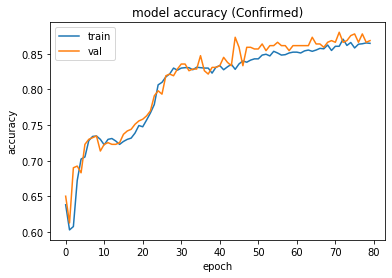

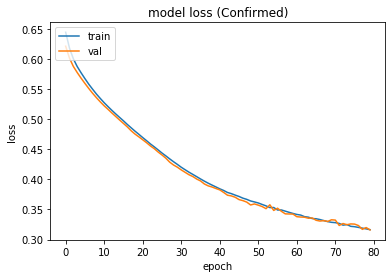

In [85]:
PlotGraphsConfirmed(history_default_confirmed) 

### Deaths

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


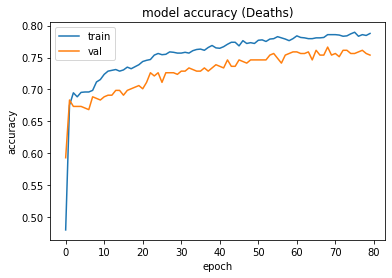

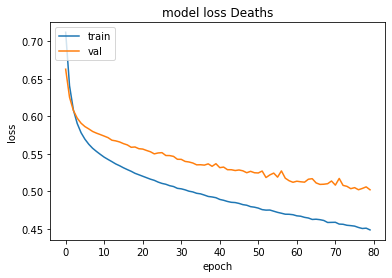

In [86]:
PlotGraphsDeaths(history_default_deaths) 

### Recovered

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


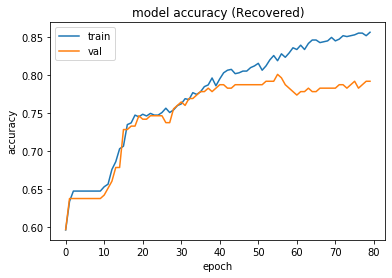

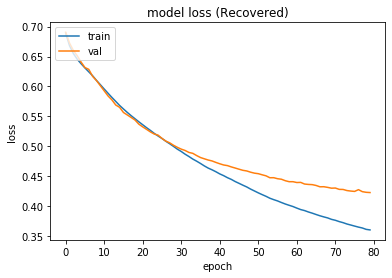

In [87]:
PlotGraphsRecovered(history_default_recovered) 

In [88]:
display(Latex(r"\newpage"));

<IPython.core.display.Latex object>

## Our Designs

## Confirmed

### Shallow

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


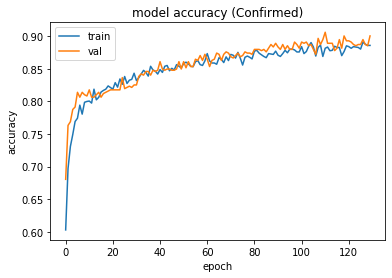

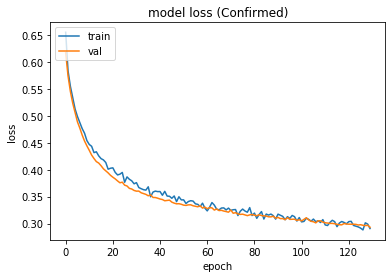

In [89]:
PlotGraphsConfirmed(history_shallow_confirmed) 

In [90]:
model_shallow_confirmed.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                512       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 130       
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Normal

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


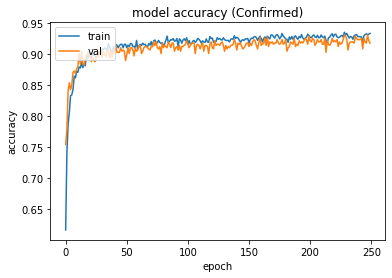

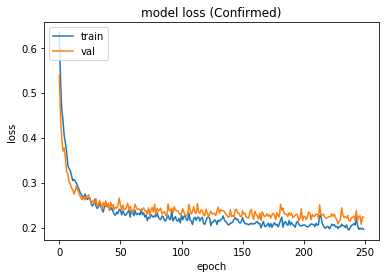

In [91]:
PlotGraphsConfirmed(history_normal_confirmed) 

In [92]:
model_normal_confirmed.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)               

### Deep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


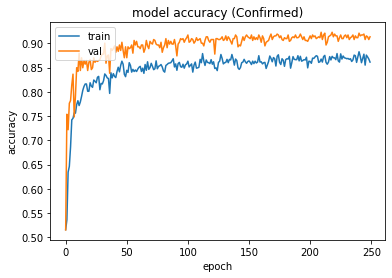

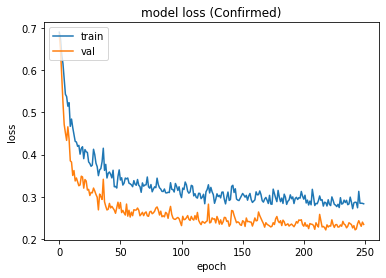

In [93]:
PlotGraphsConfirmed(history_deep_confirmed) 

In [94]:
model_deep_confirmed.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               4096      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)               

### Comparison of the different model types, for the Confirmed label

In [95]:
print(f"The accuracy of the shallow model on test data is {test_acc_shallow_confirmed}")
print(f"The loss of the shallow model on test data is {test_loss_shallow_confirmed}")
train_loss=np.mean(history_shallow_confirmed.history['loss'])
val_loss=np.mean(history_shallow_confirmed.history['val_loss'])
train_acc=np.mean(history_shallow_confirmed.history['accuracy'])
val_acc=np.mean(history_shallow_confirmed.history['val_accuracy'])
print("Train accuracy for the shallow model is : ", train_acc)
print("Train loss for the shallow model is : ", train_loss)
print("Validation loss for the shallow model is : ", val_loss)
print("Validation accuracy for the shallow model is : ", val_acc, '\n')

print(f"The accuracy of the normal model on test data is {test_acc_normal_confirmed}")
print(f"The loss of the normal model on test data is {test_loss_normal_confirmed}")
train_loss=np.mean(history_normal_confirmed.history['loss'])
val_loss=np.mean(history_normal_confirmed.history['val_loss'])
train_acc=np.mean(history_normal_confirmed.history['accuracy'])
val_acc=np.mean(history_normal_confirmed.history['val_accuracy'])
print("Train accuracy for the normal model is : ", train_acc)
print("Train loss for the normal model is : ", train_loss)
print("Validation loss for the normal model is : ", val_loss)
print("Validation accuracy for the normal model is : ", val_acc, '\n')


print(f"The accuracy of the deep model on test data is {test_acc_deep_deaths}")
print(f"The loss of the deep model on test data is {test_loss_deep_deaths}")
train_loss=np.mean(history_deep_confirmed.history['loss'])
val_loss=np.mean(history_deep_confirmed.history['val_loss'])
train_acc=np.mean(history_deep_confirmed.history['accuracy'])
val_acc=np.mean(history_deep_confirmed.history['val_accuracy'])
print("Train accuracy for the deep model is : ", train_acc)
print("Train loss for the deep model is : ", train_loss)
print("Validation loss for the deep model is : ", val_loss)
print("Validation accuracy for the deep model is : ", val_acc)

The accuracy of the shallow model on test data is 0.8947368264198303
The loss of the shallow model on test data is 0.291021466255188
Train accuracy for the shallow model is :  0.8514187831145067
Train loss for the shallow model is :  0.35121699755008406
Validation loss for the shallow model is :  0.34516130685806273
Validation accuracy for the shallow model is :  0.8572440711351541 

The accuracy of the normal model on test data is 0.9229323267936707
The loss of the normal model on test data is 0.2041517198085785
Train accuracy for the normal model is :  0.9151367623805999
Train loss for the normal model is :  0.22937090051174164
Validation loss for the normal model is :  0.2417620078921318
Validation accuracy for the normal model is :  0.9093759403228759 

The accuracy of the deep model on test data is 0.8514056205749512
The loss of the deep model on test data is 0.3519262671470642
Train accuracy for the deep model is :  0.8473400251865387
Train loss for the deep model is :  0.3283759

<p> The normal NN model, which has 4 hidden layers, has the highest test accuracy  . We found that increasing the number hidden layers to 8, did not offer an increase in test data accruracy but rather there was a decrease to 0.915. The shallow model gave the worst results. 
  
 In conclusion the best results, for the confirmed label, are given by the normal model with 4 hidden layers. These results are evaluvated by taking into account test accuracy, val accuracy, train accuracy, test loss, val loss and train loss. And, the best result based on that evaluation was provided by a normal model with 4 hidden layers.


Furthuermore dropout regularization has little effect on controlling the overfitting and underfitting on deeper models
</p>

## Deaths

### Shallow

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


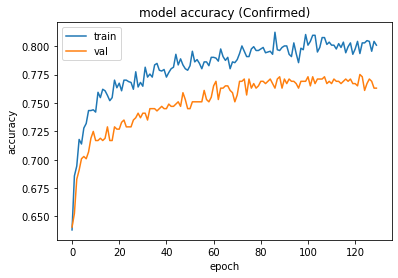

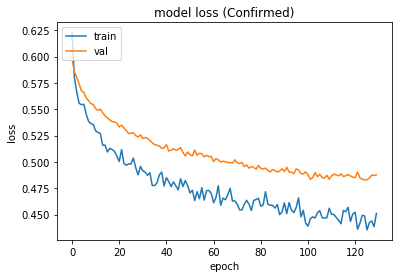

In [96]:
PlotGraphsConfirmed(history_shallow_deaths) 

In [97]:
model_shallow_deaths.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 64)                512       
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 130       
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Normal

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


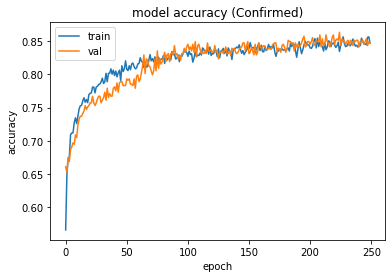

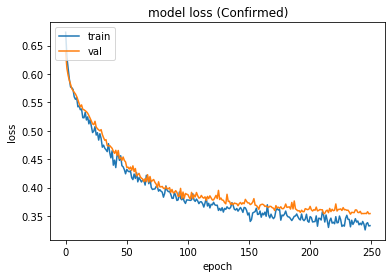

In [98]:
PlotGraphsConfirmed(history_normal_deaths) 

In [99]:
model_normal_deaths.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_15 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 2)                

### Deep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


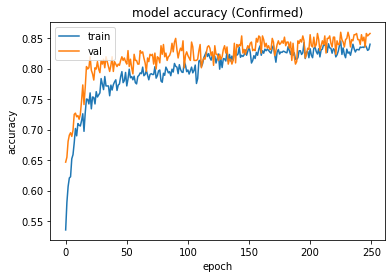

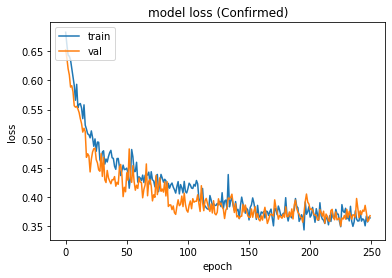

In [100]:
PlotGraphsConfirmed(history_deep_deaths) 

In [101]:
model_deep_deaths.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               4096      
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 64)               

### Comparison of the different model types, for the Deaths label

In [102]:
print(f"The accuracy of the shallow model on test data is {test_acc_shallow_deaths}")
print(f"The loss of the shallow model on test data is {test_loss_shallow_deaths}")
train_loss=np.mean(history_shallow_deaths.history['loss'])
val_loss=np.mean(history_shallow_deaths.history['val_loss'])
train_acc=np.mean(history_shallow_deaths.history['accuracy'])
val_acc=np.mean(history_shallow_deaths.history['val_accuracy'])
print("Train accuracy for the shallow model is : ", train_acc)
print("Train loss for the shallow model is : ", train_loss)
print("Validation loss for the shallow model is : ", val_loss)
print("Validation accuracy for the shallow model is : ", val_acc, '\n')

print(f"The accuracy of the normal model on test data is {test_acc_normal_deaths}")
print(f"The loss of the normal model on test data is {test_loss_normal_deaths}")
train_loss=np.mean(history_normal_deaths.history['loss'])
val_loss=np.mean(history_normal_deaths.history['val_loss'])
train_acc=np.mean(history_normal_deaths.history['accuracy'])
val_acc=np.mean(history_normal_deaths.history['val_accuracy'])
print("Train accuracy for the normal model is : ", train_acc)
print("Train loss for the normal model is : ", train_loss)
print("Validation loss for the normal model is : ", val_loss)
print("Validation accuracy for the normal model is : ", val_acc, '\n')


print(f"The accuracy of the deep model on test data is {test_acc_deep_deaths}")
print(f"The loss of the deep model on test data is {test_loss_deep_deaths}")
train_loss=np.mean(history_deep_deaths.history['loss'])
val_loss=np.mean(history_deep_deaths.history['val_loss'])
train_acc=np.mean(history_deep_deaths.history['accuracy'])
val_acc=np.mean(history_deep_deaths.history['val_accuracy'])
print("Train accuracy for the deep model is : ", train_acc)
print("Train loss for the deep model is : ", train_loss)
print("Validation loss for the deep model is : ", val_loss)
print("Validation accuracy for the deep model is : ", val_acc)

The accuracy of the shallow model on test data is 0.8132529854774475
The loss of the shallow model on test data is 0.4371849596500397
Train accuracy for the shallow model is :  0.7821200224069449
Train loss for the shallow model is :  0.47603625036202946
Validation loss for the shallow model is :  0.5089971631765365
Validation accuracy for the shallow model is :  0.7508032106436215 

The accuracy of the normal model on test data is 0.849397599697113
The loss of the normal model on test data is 0.3384205996990204
Train accuracy for the normal model is :  0.8210348527431488
Train loss for the normal model is :  0.3932240065336227
Validation loss for the normal model is :  0.4051549732685089
Validation accuracy for the normal model is :  0.8181606414318084 

The accuracy of the deep model on test data is 0.8514056205749512
The loss of the deep model on test data is 0.3519262671470642
Train accuracy for the deep model is :  0.7990991966724396
Train loss for the deep model is :  0.415512322

<p> The normal NN model, which has 4 hidden layers, has the highest accuracy . We found that increasing the number hidden layers to 8, did not offer an increase in test data accruracy. The shallow model gave the similar results to the normal model however, the test loss was a lot worse. 
    
In conclusion the best results, for the deaths label, are given by the normal model with 4 hidden layers. These results are evaluvated by taken into account test accuracy, val accuracy, train accuracy, test loss, val loss and train loss. And, the best result based on that evaluation was provided by a normal model with 4 hidden layers.

Furthermore dropout regularization has little effect on controlling the overfitting and underfitting on deeper models
</p>

## Recovered

### Shallow

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


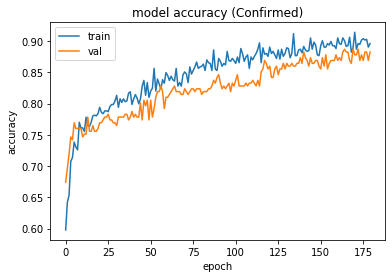

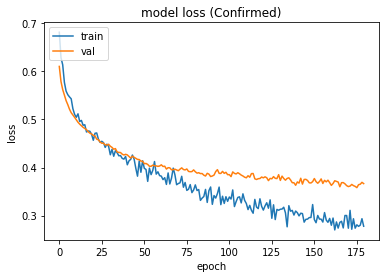

In [103]:
PlotGraphsConfirmed(history_shallow_recovered) 

In [104]:
model_shallow_recovered.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                512       
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 130       
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Normal

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


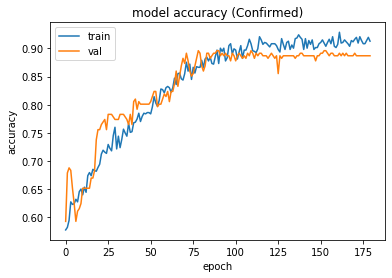

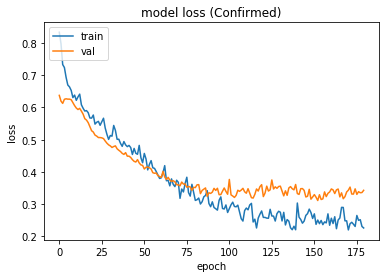

In [105]:
PlotGraphsConfirmed(history_normal_recovered) 

In [106]:
model_normal_recovered.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               2048      
_________________________________________________________________
dropout_26 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 2)               

### Deep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


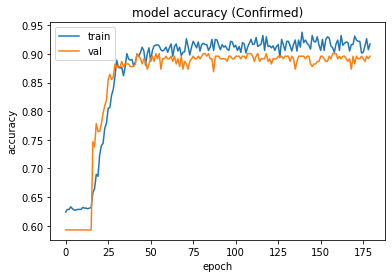

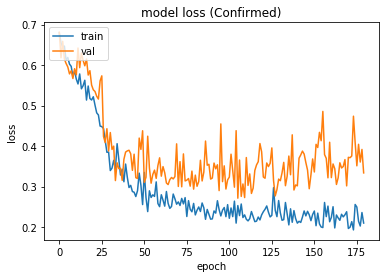

In [107]:
PlotGraphsConfirmed(history_deep_recovered) 

In [108]:
model_deep_recovered.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               4096      
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)              

### Comparison of the different model types, for the Recovered label

In [109]:
print(f"The accuracy of the shallow model on test data is {test_acc_shallow_recovered}")
print(f"The loss of the shallow model on test data is {test_loss_shallow_recovered}")
train_loss=np.mean(history_shallow_recovered.history['loss'])
val_loss=np.mean(history_shallow_recovered.history['val_loss'])
train_acc=np.mean(history_shallow_recovered.history['accuracy'])
val_acc=np.mean(history_shallow_recovered.history['val_accuracy'])
print("Train accuracy for the shallow model is : ", train_acc)
print("Train loss for the shallow model is : ", train_loss)
print("Validation loss for the shallow model is : ", val_loss)
print("Validation accuracy for the shallow model is : ", val_acc, '\n')

print(f"The accuracy of the normal model on test data is {test_acc_normal_recovered}")
print(f"The loss of the normal model on test data is {test_loss_normal_recovered}")
train_loss=np.mean(history_normal_recovered.history['loss'])
val_loss=np.mean(history_normal_recovered.history['val_loss'])
train_acc=np.mean(history_normal_recovered.history['accuracy'])
val_acc=np.mean(history_normal_recovered.history['val_accuracy'])
print("Train accuracy for the normal model is : ", train_acc)
print("Train loss for the normal model is : ", train_loss)
print("Validation loss for the normal model is : ", val_loss)
print("Validation accuracy for the normal model is : ", val_acc, '\n')


print(f"The accuracy of the deep model on test data is {test_acc_deep_recovered}")
print(f"The loss of the deep model on test data is {test_loss_deep_recovered}")
train_loss=np.mean(history_deep_recovered.history['loss'])
val_loss=np.mean(history_deep_recovered.history['val_loss'])
train_acc=np.mean(history_deep_recovered.history['accuracy'])
val_acc=np.mean(history_deep_recovered.history['val_accuracy'])
print("Train accuracy for the deep model is : ", train_acc)
print("Train loss for the deep model is : ", train_loss)
print("Validation loss for the deep model is : ", val_loss)
print("Validation accuracy for the deep model is : ", val_acc)

The accuracy of the shallow model on test data is 0.9347826242446899
The loss of the shallow model on test data is 0.24653641879558563
Train accuracy for the shallow model is :  0.8466528233554628
Train loss for the shallow model is :  0.36692595763338937
Validation loss for the shallow model is :  0.40537656479411655
Validation accuracy for the shallow model is :  0.8234037309885025 

The accuracy of the normal model on test data is 0.9492753744125366
The loss of the normal model on test data is 0.2018384039402008
Train accuracy for the normal model is :  0.8380269275771247
Train loss for the normal model is :  0.3686616144246525
Validation loss for the normal model is :  0.39591131094429227
Validation accuracy for the normal model is :  0.8365761786699295 

The accuracy of the deep model on test data is 0.9384058117866516
The loss of the deep model on test data is 0.43604904413223267
Train accuracy for the deep model is :  0.8742481446928448
Train loss for the deep model is :  0.2979

<p> For the recovered label both shallow and normal network both show good results, with little differences between them. These results are evaluvated by taken into account test accuracy, val accuracy, train accuracy, test loss, val loss and train loss.
    
Hence both shallow or normal network are both viable for the recovered label.
</p>

### The effect of our number of Parameters
<p> The total number of parameters in the best model in Confirmed are 45,346.They are the parameters that our model will learn. Generally more parameters can lead to overfitting but it can be regularized using regularization(dropout). However increasing the number of parameter doesn't always have increase in accuracy. As evident in the deep model for the Confirmed label, which has 179,366 paramter, however it doesn't give better results.  </p>


## Selection of Optimizer and Activation functions.

### Choice of optimizer

<p> For comparison of different optimizers we will use the same model of two hidden layers with twenty nodes each.</p>

Optimizers Tested:
<ol>
    <li> SGD
    <li> RMSprop
    <li> Adam
    <li> Adadelta
</ol>
    

### SGD

In [110]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(20, activation='relu', input_dim=7),
        tf.keras.layers.Dense(20, activation='relu',),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
x_train,x_test,y_train,y_test=train_test_split(x_confirmed, y_confirmed_newarr, test_size=0.2, random_state=98)

model.compile(optimizer='sgd', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.20, epochs=80, batch_size=20,verbose=0);

In [111]:
test_loss_sgd, test_acc_sgd = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy SGD: ", test_acc_sgd)

17/17 - 0s - loss: 0.3459 - accuracy: 0.8327
Test accuracy SGD:  0.8327067494392395


### RMSprop

In [112]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(20, activation='relu', input_dim=7),
        tf.keras.layers.Dense(20, activation='relu',),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
x_train,x_test,y_train,y_test=train_test_split(x_confirmed, y_confirmed_newarr, test_size=0.2, random_state=98)

model.compile(optimizer='rmsprop', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.20, epochs=80, batch_size=20,verbose=0);

In [113]:
test_loss_rmsprop, test_acc_rmsprop = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy RMSprop: ", test_acc_rmsprop)

17/17 - 0s - loss: 0.2453 - accuracy: 0.8985
Test accuracy RMSprop:  0.8984962701797485


### Adam

In [114]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(20, activation='relu', input_dim=7),
        tf.keras.layers.Dense(20, activation='relu',),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
x_train,x_test,y_train,y_test=train_test_split(x_confirmed, y_confirmed_newarr, test_size=0.2, random_state=98)

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.20, epochs=80, batch_size=20,verbose=0);

In [115]:
test_loss_adam, test_acc_adam = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy adam: ", test_acc_adam)

17/17 - 0s - loss: 0.2339 - accuracy: 0.9248
Test accuracy adam:  0.9248120188713074


### Adadelta

In [116]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(20, activation='relu', input_dim=7),
        tf.keras.layers.Dense(20, activation='relu',),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
x_train,x_test,y_train,y_test=train_test_split(x_confirmed, y_confirmed_newarr, test_size=0.2, random_state=98)

model.compile(optimizer='adadelta', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.20, epochs=80, batch_size=20,verbose=0);

In [117]:
test_loss_adadelta, test_acc_adadelta = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy adadelta: ", test_acc_adadelta)

17/17 - 0s - loss: 0.6607 - accuracy: 0.5658
Test accuracy adadelta:  0.5657894611358643


## Summary

In [118]:
print(f"The test accuracy of model using sgd is {test_acc_sgd} ")
print(f"The test accuracy of model using rmsprop is {test_acc_rmsprop} ")
print(f"The test accuracy of model using adam is {test_acc_adam} ")
print(f"The test accuracy of model using adadelta is {test_acc_adadelta} ")

The test accuracy of model using sgd is 0.8327067494392395 
The test accuracy of model using rmsprop is 0.8984962701797485 
The test accuracy of model using adam is 0.9248120188713074 
The test accuracy of model using adadelta is 0.5657894611358643 


## Choice of OutputLayer Activation Function

<p> The following evaluvation of choice of output layer activation function will be done on Confirmed label. To analyse the results of the diiferent activation functions test data accuracy

### Softmax

In [119]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(20, activation='relu', input_dim=7),
        tf.keras.layers.Dense(20, activation='relu',),
        tf.keras.layers.Dense(2, activation='softmax')
        ])
x_train,x_test,y_train,y_test=train_test_split(x_confirmed, y_confirmed_newarr, test_size=0.2, random_state=98)

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.20, epochs=80, batch_size=20,verbose=0);

In [120]:
test_loss_softmax, test_acc_softmax = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy softmax: ", test_acc_softmax)

17/17 - 0s - loss: 0.2505 - accuracy: 0.8872
Test accuracy softmax:  0.8872180581092834


### Sigmoid

In [121]:
model = tf.keras.models.Sequential([    
        tf.keras.layers.Dense(20, activation='relu', input_dim=7),
        tf.keras.layers.Dense(20, activation='relu',),
        tf.keras.layers.Dense(2, activation='sigmoid')
        ])
x_train,x_test,y_train,y_test=train_test_split(x_confirmed, y_confirmed_newarr, test_size=0.2, random_state=98)

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.20, epochs=80, batch_size=20,verbose=0);

In [122]:
test_loss_sigmoid, test_acc_sigmoid = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy sigmoid: ", test_acc_sigmoid)

17/17 - 0s - loss: 0.2414 - accuracy: 0.9135
Test accuracy sigmoid:  0.9135338068008423


## Summary

In [123]:
print(f"The test accuracy of model using softmax output layer activation function is {test_acc_softmax} ")
print(f"The test accuracy of model using sigmoid output layer activation function is {test_acc_sigmoid} ")

The test accuracy of model using softmax output layer activation function is 0.8872180581092834 
The test accuracy of model using sigmoid output layer activation function is 0.9135338068008423 


<p> The softmax activation function gives us increase in accuracy compared to sigmoid. This trend was seen in all three labels. Hence in our model we used the softmax output activation function. 